In [4]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [5]:
############# START OF EMOTION TEXT CLASSIFIER ##############

In [6]:
###### FETCH DATA #####
path = 'Emotion_final.csv'
messages = pd.read_csv(path)
messages

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [7]:
##### CLEAN DATA #####
import re #use regex
messages.dropna(inplace=True) # drop null values

for i in range(0, len(messages)):
    messages['Text'][i] = messages['Text'][i].lower()
    messages['Text'][i] = re.sub(r'@[A-Za-z0-9]+', '', messages['Text'][i]) # remove @mentions 
    messages['Text'][i] = re.sub(r'#', '', messages['Text'][i])# remove # tag
    messages['Text'][i] = re.sub(r'RT[\s]+', '', messages['Text'][i]) # remove the RT
    messages['Text'][i] = re.sub(r'https?:\/\/\S+', '', messages['Text'][i]) # remove links
    messages['Text'][i] = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', messages['Text'][i]) # remove unicode characters
    messages['Text'][i] = re.sub(r'"', '', messages['Text'][i]) #remove "
    messages['Text'][i] = re.sub(r':', '', messages['Text'][i]) #remove :

messages

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,melissa stared at her friend in dism,fear
21455,successive state elections have seen the gover...,fear
21456,vincent was irritated but not dismay,fear
21457,kendall-hume turned back to face the dismayed ...,fear


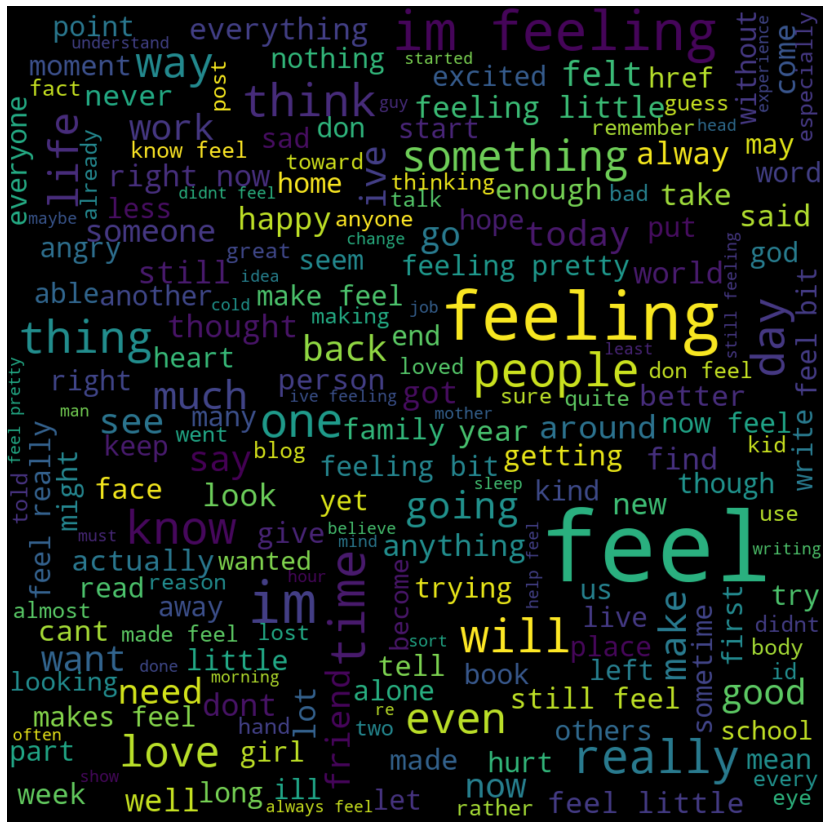

In [9]:
##### CHECK THE MOST COMMON WORDS #####
#install wordcloud by typing "conda install -c conda-forge wordcloud=1.6.0" in anaconda terminal
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words= ' '.join([text for text in messages['Text']])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
count = 0
for text in messages['Text']:
    for word in text.split():
        if word == "feel":
            count += 1

count

13973

In [47]:
#get all texts for each category and make a plot
anger = []
fear = [] 
happy = []
love= []
sadness = [] 
surprise = []

for i in range(len(messages)):
    if messages['Emotion'][i] == 'anger':
        anger.append(messages['Text'][i])
    if messages['Emotion'][i] == 'fear':
        fear.append(messages['Text'][i])
    if messages['Emotion'][i] == 'happy':
        happy.append(messages['Text'][i])
    if messages['Emotion'][i] == 'love':
        love.append(messages['Text'][i])
    if messages['Emotion'][i] == 'sadness':
        sadness.append(messages['Text'][i])
    if messages['Emotion'][i] == 'surprise':
        sadness.append(messages['Text'][i])


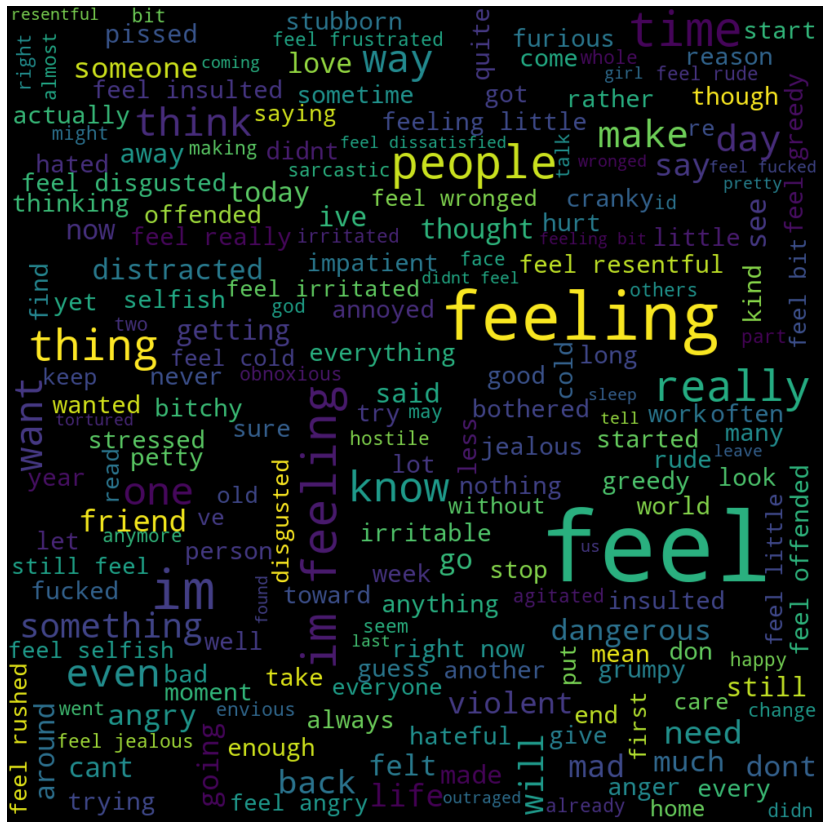

In [48]:
#WORD CLOUD FOR ANGER
words= ' '.join([text for text in anger])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

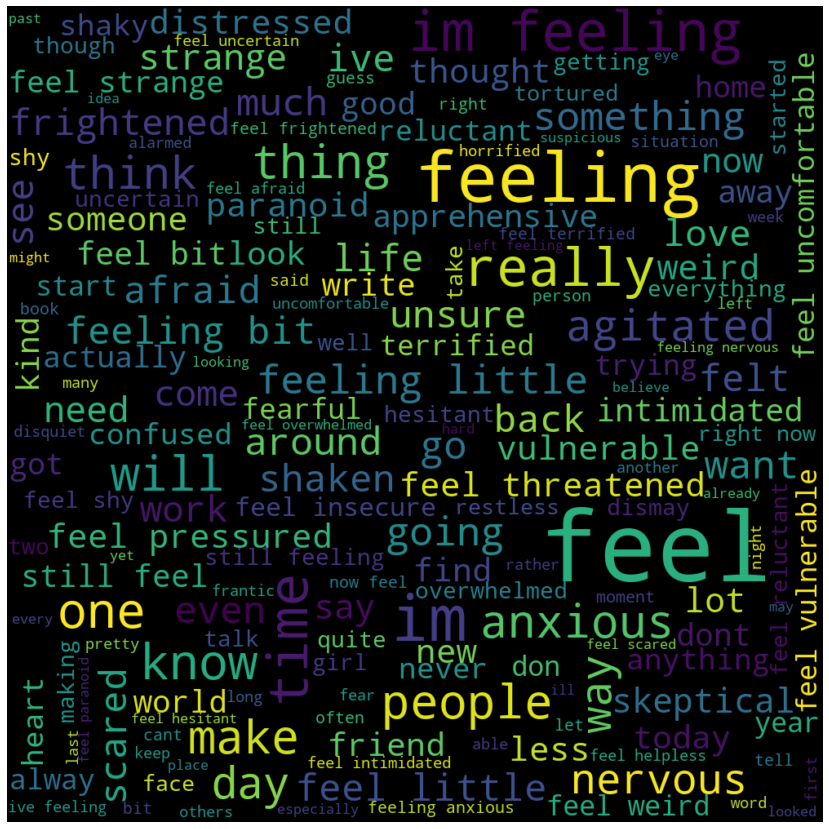

In [49]:
#WORD CLOUD FOR FEAR
words= ' '.join([text for text in fear])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

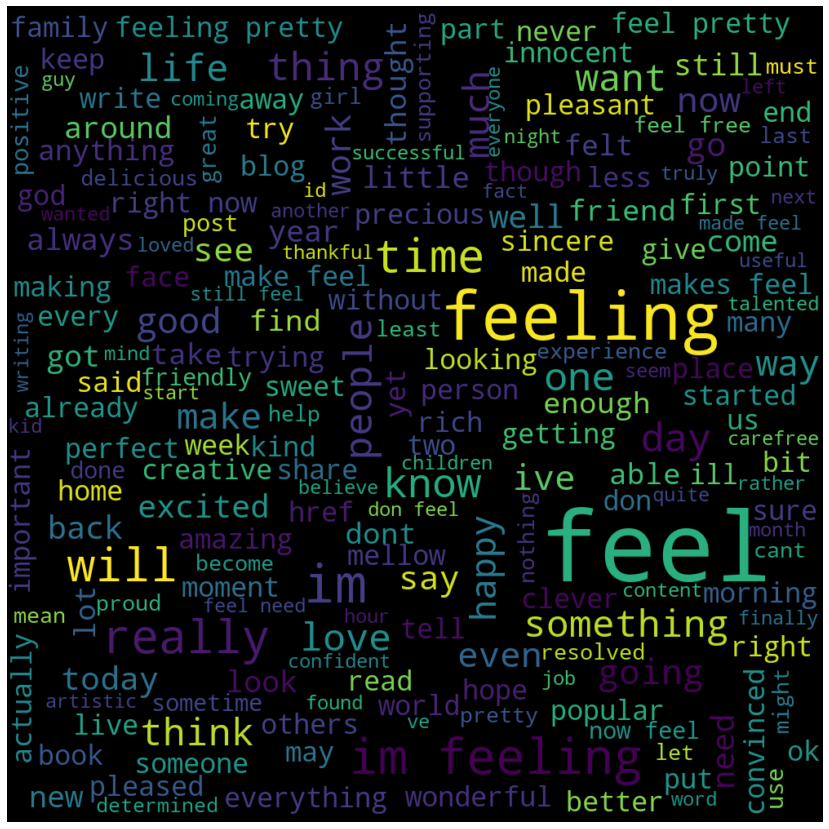

In [50]:
#WORD CLOUD FOR HAPPY
words= ' '.join([text for text in happy])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

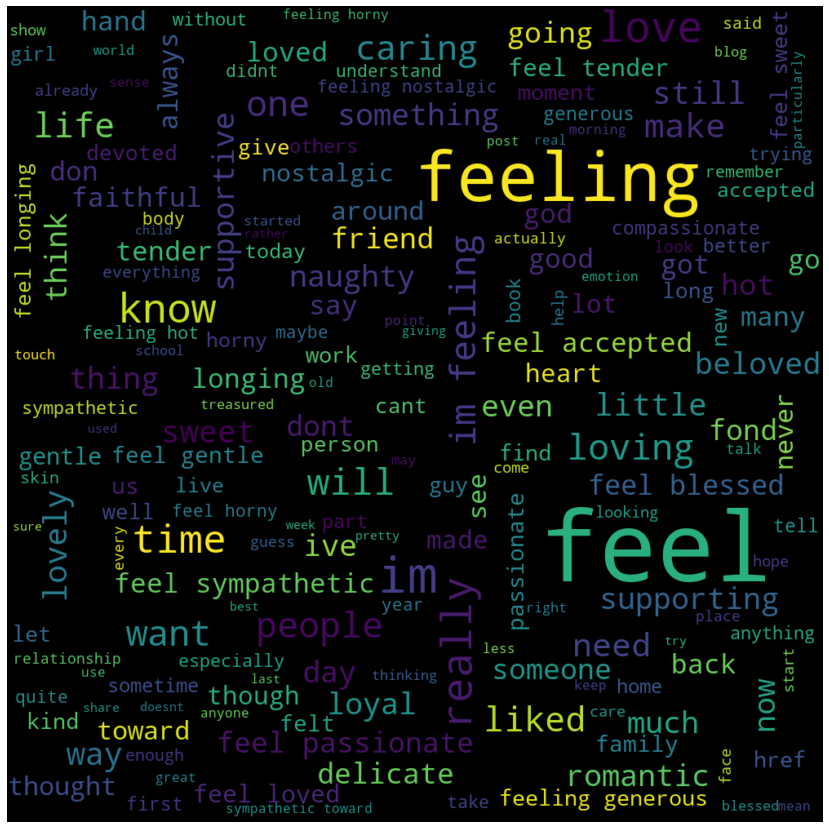

In [52]:
#WORD CLOUD FOR LOVE
words= ' '.join([text for text in love])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

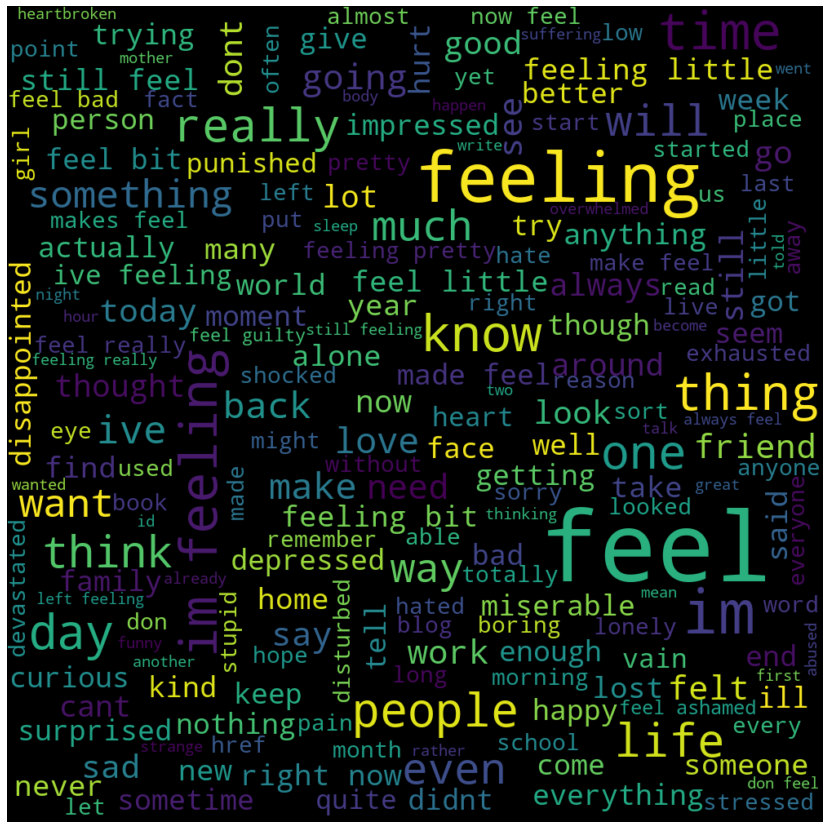

In [53]:
#WORD CLOUD FOR SADNESS
words= ' '.join([text for text in sadness])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
#WORD CLOUD FOR SURPRISE
words= ' '.join([text for text in surprise])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [46]:
# import and instantiate CountVectorizer (with the default parameters)
# using the variable name vect
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [47]:
messages['Emotion'] = messages.Emotion.map({'anger':0, 'fear':1, 'happy':2, 'love':3, 'sadness':4, 'surprise':5 })
messages

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
21454,melissa stared at her friend in dism,1
21455,successive state elections have seen the gover...,1
21456,vincent was irritated but not dismay,1
21457,kendall-hume turned back to face the dismayed ...,1


In [48]:
X = messages.Text
y = messages.Emotion

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=427)

In [50]:
# instantiate the count vectorizer and assign it to vect again.
vect = CountVectorizer()

In [51]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)

CountVectorizer()

In [ ]:
tokens = vect.get_feature_names()

In [ ]:
tokens

In [53]:
#combine fit and transform into a single step using the fit_transform method
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<18240x17694 sparse matrix of type '<class 'numpy.int64'>'
	with 284014 stored elements in Compressed Sparse Row format>

In [54]:
# transform testing data, too, into a document-term matrix
X_test_dtm = vect.transform(X_test)

In [55]:
# import and instantiate a Multinomial Naive Bayes model
# use the nb variable
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [56]:
# train the model using X_train_dtm and the fit() method
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [57]:
# make class predictions for X_test_dtm using the predict() function
y_pred_class = nb.predict(X_test_dtm)

In [58]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.7576887232059646

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_df=640, stop_words=stopwords.words('english'))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


0.8626902764833799

Text(76.2, 0.5, 'true value')

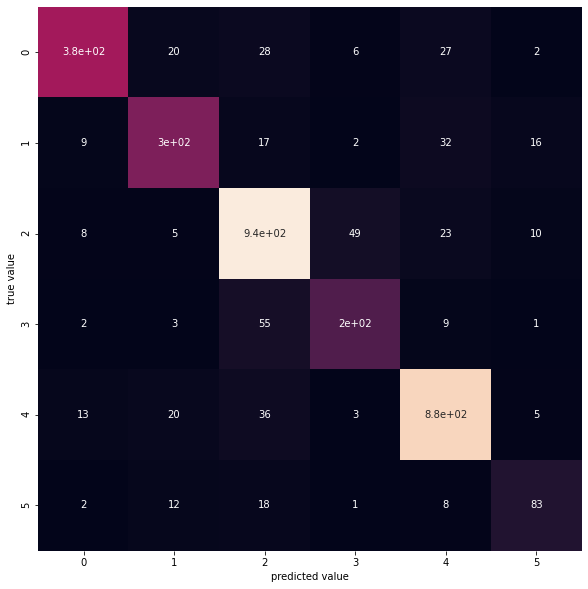

In [61]:
mat = metrics.confusion_matrix(y_test, y_pred_class)

import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


In [ ]:
############# END OF EMOTION TEXT CLASSIFIER ##############

In [70]:
print(nb.predict(vect.transform(["I just pretended to smile when I saw her walking with her boyfriend"])))

[2]
